#Tecnológico de Monterrey
###Maestría en Inteligencia Artificial Aplicada
######Ciencia y analítica de datos
######Prof Dra. Maria de la Paz Rico Fernández


# Equipo 45
###### Nancy Elena Estanislao Lizárraga - A01169334
###### Gustavo Rene Ramos Ojeda - A01793599

In [1]:
#Importación de Librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from matplotlib import rc
import requests, zipfile
from io import BytesIO
import geopandas as gpd
from shapely.geometry import Point

# Para los mapas
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

import matplotlib.font_manager as font_manager;

# Para desactivar los warnings
import warnings

import pylab as pl
la = pl.matplotlib.font_manager.FontManager()
lu = pl.matplotlib.font_manager.FontProperties(family = 'Source Sans Pro')
la.findfont(lu)

'C:\\Users\\Gustavo Ramos\\AppData\\Local\\Microsoft\\Windows\\Fonts\\SourceSansPro-Regular.ttf'

In [2]:
warnings.filterwarnings('ignore')
font_manager._get_fontconfig_fonts.cache_clear()

In [3]:
#Importación del data frame de aguas superficiales

df=pd.read_csv('superficiales_2020.csv', encoding = 'latin1')
df.head(5)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [4]:
#Revisión del tipo de información que se tiene en cada columna y confirmación de datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [5]:
df.isnull().sum()

CLAVE                      648
SITIO                      648
ORGANISMO_DE_CUENCA        648
ESTADO                     648
MUNICIPIO                  648
CUENCA                     649
CUERPO DE AGUA             662
TIPO                       648
SUBTIPO                    662
LONGITUD                   648
LATITUD                    648
PERIODO                    648
DBO_mg/L                  1560
CALIDAD_DBO               1560
DQO_mg/L                  1560
CALIDAD_DQO               1560
SST_mg/L                   652
CALIDAD_SST                652
COLI_FEC_NMP_100mL        1559
CALIDAD_COLI_FEC          1559
E_COLI_NMP_100mL          1559
CALIDAD_E_COLI            1559
ENTEROC_NMP_100mL         3237
CALIDAD_ENTEROC           3237
OD_PORC                   2344
CALIDAD_OD_PORC           2344
OD_PORC_SUP               2522
CALIDAD_OD_PORC_SUP       2522
OD_PORC_MED               3654
CALIDAD_OD_PORC_MED       3654
OD_PORC_FON               3195
CALIDAD_OD_PORC_FON       3195
TOX_D_48

In [6]:
#Definición de variables, vamos a clasificarlas por categoricas, ordinales, numericas y binarias 

categoricas = ['CLAVE','SITIO','ORGANISMO_DE_CUENCA','ESTADO','MUNICIPIO','CUENCA','CUERPO DE AGUA','TIPO','SUBTIPO','SEMAFORO','CONTAMINANTES','GRUPO']
ordinales = ['CALIDAD_DBO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','CALIDAD_ENTEROC','CALIDAD_OD_PORC','CALIDAD_OD_PORC_SUP','CALIDAD_OD_PORC_MED','CALIDAD_OD_PORC_FON','CALIDAD_TOX_D_48','CALIDAD_TOX_V_15','CALIDAD TOX_D_48_SUP','CALIDAD_TOX_D_48_FON','CALIDAD_TOX_FIS_SUP_15','CALIDAD_TOX_FIS_FON_15']
numericas = ['LONGITUD','LATITUD','PERIODO','DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL','OD_PORC','OD_PORC_SUP','OD_PORC_MED','OD_PORC_FON','TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_D_48_FON_UT','TOX_FIS_SUP_15_UT','TOX_FIS_FON_15_UT']
binarias = ['CUMPLE_CON_DBO','CUMPLE_CON_DQO','CUMPLE_CON_SST','CUMPLE_CON_CF','CUMPLE_CON_E_COLI','CUMPLE_CON_ENTEROC','CUMPLE_CON_OD','CUMPLE_CON_TOX']

In [7]:
# Vamos a ver como estan los estadisticos de la tabla
df.describe()

,LONGITUD,LATITUD,PERIODO,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15
count,3493.000000,3493.000000,3493.0,0.0,0.0,0.0,0.0
mean,-100.359969,21.046992,2020.0,NaN,NaN,NaN,NaN
std,6.122773,3.893696,0.0,NaN,NaN,NaN,NaN
min,-117.124030,14.534910,2020.0,NaN,NaN,NaN,NaN
25%,-103.882310,18.396070,2020.0,NaN,NaN,NaN,NaN
50%,-99.795530,20.148980,2020.0,NaN,NaN,NaN,NaN
75%,-96.860230,22.828930,2020.0,NaN,NaN,NaN,NaN
max,-86.732150,32.706500,2020.0,NaN,NaN,NaN,NaN


In [8]:
df.describe(include=['object'])

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,DBO_mg/L,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
count,3493,3493,3493,3493,3493,3492,3479,3493,3479,2581,...,2226,3493,3493,3493,3493,3493,3493,3493,3493,3493
unique,3493,3481,13,32,755,521,1067,23,27,743,...,96,3,3,3,3,3,3,3,2,3
top,DLAGU8,ANTES DE LA CONFLUENCIA CON EL RIO ATOYAC,LERMA SANTIAGO PACIFICO,VERACRUZ DE IGNACIO DE LA LLAVE,ACAPULCO DE JUAREZ,YUCATAN (RESTO DE RH 32),OCEANO PACIFICO,LOTICO,RIO,<2,...,"CF,E_COLI,",SI,SI,SI,NO,SI,ND,SI,SI,LOTICO
freq,1,3,709,326,60,101,139,1263,1478,1224,...,439,2319,1650,3104,1634,1453,2589,2958,3411,1772


Los datos vacíos los vamos a sustituir de la siguiente manera:


*   En las categoricas, ordinales y binarias se va a poner la moda
*   En las numericas se van a poner la mediana










In [9]:
# Hay que limpiar eldataset, salen numeros con signos, por ejemplo <2.00
# Vamos a quitar los signos < y pasaremos el resultado a tipo float

def de_str_a_float(columnas, df2):
  for col in columnas:
    for x in df2[col]:
      try:
        if "<" in x:
          y = x.replace('<', '')
          df2[col] = df2[col].replace(x, float(y))
      except Exception as err:
        pass  
  return df2 

In [10]:
# Recorremos los valores de las columnas categoricas, ordinales y binarias y sustituimos los valores nulos por la moda, borramos la fila que tenga mas de un valor nulo

def sacar_moda(columnas, df2):
  for col in columnas:
    try:
      moda = df2[col].mode()[0]
      print("la moda de " +col + " es: " + moda)
      df2[col] = df2[col].replace(np.nan, moda)
    except Exception as err:
      print("Se eliminara esta columna " + col + " " + str(err))
      df2.dropna(thresh = 1, axis = 1, inplace = True)
  return df2

In [11]:
# Recorremos los valores de las columnas numericas y sustituimos los valores nulos por la mediana, borramos la fila que tenga mas de un valor nulo

def sacar_mediana(columnas, df2):
  for col in columnas:
    try:
      median = df2[col].median()
      print("la mediana de " +col + " es: " + str(median))
      df2[col] = df2[col].replace(np.nan, median)
    except Exception as err:
      print("Se eliminara esta columna " + col + " " + str(err))
      df2.dropna(thresh = 1, axis = 1, inplace = True)
  return df2

In [12]:
df_new2 = de_str_a_float(numericas, df)

In [13]:
df_new3 = sacar_mediana(numericas, df_new2)

la mediana de LONGITUD es: -99.79553
la mediana de LATITUD es: 20.14898
la mediana de PERIODO es: 2020.0
la mediana de DBO_mg/L es: 2.63
la mediana de DQO_mg/L es: 27.01
la mediana de SST_mg/L es: 24.3
la mediana de COLI_FEC_NMP_100mL es: 2400.0
la mediana de E_COLI_NMP_100mL es: 424.0
la mediana de ENTEROC_NMP_100mL es: 3.0
la mediana de OD_PORC es: 68.3
la mediana de OD_PORC_SUP es: 84.1
la mediana de OD_PORC_MED es: 72.4
la mediana de OD_PORC_FON es: 67.5
la mediana de TOX_D_48_UT es: 1.0
la mediana de TOX_V_15_UT es: 1.0
la mediana de TOX_D_48_SUP_UT es: 1.0
la mediana de TOX_D_48_FON_UT es: nan
la mediana de TOX_FIS_SUP_15_UT es: 1.0
la mediana de TOX_FIS_FON_15_UT es: nan


In [14]:
df_new3 = sacar_moda(ordinales, df_new3)

la moda de CALIDAD_DBO es: Excelente
la moda de CALIDAD_DQO es: Contaminada
la moda de CALIDAD_SST es: Excelente
la moda de CALIDAD_COLI_FEC es: Fuertemente contaminada
la moda de CALIDAD_E_COLI es: Fuertemente contaminada
la moda de CALIDAD_ENTEROC es: Excelente
la moda de CALIDAD_OD_PORC es: Excelente
la moda de CALIDAD_OD_PORC_SUP es: Excelente
la moda de CALIDAD_OD_PORC_MED es: Excelente
la moda de CALIDAD_OD_PORC_FON es: Excelente
la moda de CALIDAD_TOX_D_48 es: No Toxico
la moda de CALIDAD_TOX_V_15 es: No Toxico
la moda de CALIDAD TOX_D_48_SUP es: No Toxico
Se eliminara esta columna CALIDAD_TOX_D_48_FON 0
la moda de CALIDAD_TOX_FIS_SUP_15 es: No Toxico
Se eliminara esta columna CALIDAD_TOX_FIS_FON_15 'CALIDAD_TOX_FIS_FON_15'


In [15]:
df_new3 = sacar_moda(categoricas, df_new3)

la moda de CLAVE es: DLAGU11
la moda de SITIO es: ANTES DE LA CONFLUENCIA CON EL RIO ATOYAC
la moda de ORGANISMO_DE_CUENCA es: LERMA SANTIAGO PACIFICO
la moda de ESTADO es: VERACRUZ DE IGNACIO DE LA LLAVE
la moda de MUNICIPIO es: ACAPULCO DE JUAREZ
la moda de CUENCA es: YUCATAN (RESTO DE RH 32)
la moda de CUERPO DE AGUA es: OCEANO PACIFICO
la moda de TIPO es: LOTICO
la moda de SUBTIPO es: RIO
la moda de SEMAFORO es: Verde
la moda de CONTAMINANTES es: CF,E_COLI,
la moda de GRUPO es: LOTICO


In [16]:
df_new3 = sacar_moda(binarias, df_new3)

la moda de CUMPLE_CON_DBO es: SI
la moda de CUMPLE_CON_DQO es: SI
la moda de CUMPLE_CON_SST es: SI
la moda de CUMPLE_CON_CF es: NO
la moda de CUMPLE_CON_E_COLI es: SI
la moda de CUMPLE_CON_ENTEROC es: ND
la moda de CUMPLE_CON_OD es: SI
la moda de CUMPLE_CON_TOX es: SI


In [17]:
# Vamos a eliminar las filas que tienen puro 0

numericas.remove("TOX_D_48_FON_UT")
numericas.remove("TOX_FIS_FON_15_UT")
df_new3[numericas] = df_new3[numericas].astype(float)

In [18]:
# Vamos a ver si aun hay nulos
df_new3.isnull().values.any()

False

In [19]:
# Si funciono la imputacion, solo comprobemos una vez mas que todo bien
df_new3.isnull().sum()

CLAVE                     0
SITIO                     0
ORGANISMO_DE_CUENCA       0
ESTADO                    0
MUNICIPIO                 0
CUENCA                    0
CUERPO DE AGUA            0
TIPO                      0
SUBTIPO                   0
LONGITUD                  0
LATITUD                   0
PERIODO                   0
DBO_mg/L                  0
CALIDAD_DBO               0
DQO_mg/L                  0
CALIDAD_DQO               0
SST_mg/L                  0
CALIDAD_SST               0
COLI_FEC_NMP_100mL        0
CALIDAD_COLI_FEC          0
E_COLI_NMP_100mL          0
CALIDAD_E_COLI            0
ENTEROC_NMP_100mL         0
CALIDAD_ENTEROC           0
OD_PORC                   0
CALIDAD_OD_PORC           0
OD_PORC_SUP               0
CALIDAD_OD_PORC_SUP       0
OD_PORC_MED               0
CALIDAD_OD_PORC_MED       0
OD_PORC_FON               0
CALIDAD_OD_PORC_FON       0
TOX_D_48_UT               0
CALIDAD_TOX_D_48          0
TOX_V_15_UT               0
CALIDAD_TOX_V_15    

In [20]:
# Vamos a checar que todos los numericos sean float

df_new3[numericas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LONGITUD            4141 non-null   float64
 1   LATITUD             4141 non-null   float64
 2   PERIODO             4141 non-null   float64
 3   DBO_mg/L            4141 non-null   float64
 4   DQO_mg/L            4141 non-null   float64
 5   SST_mg/L            4141 non-null   float64
 6   COLI_FEC_NMP_100mL  4141 non-null   float64
 7   E_COLI_NMP_100mL    4141 non-null   float64
 8   ENTEROC_NMP_100mL   4141 non-null   float64
 9   OD_PORC             4141 non-null   float64
 10  OD_PORC_SUP         4141 non-null   float64
 11  OD_PORC_MED         4141 non-null   float64
 12  OD_PORC_FON         4141 non-null   float64
 13  TOX_D_48_UT         4141 non-null   float64
 14  TOX_V_15_UT         4141 non-null   float64
 15  TOX_D_48_SUP_UT     4141 non-null   float64
 16  TOX_FI

In [21]:
df_new3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   4141 non-null   object 
 1   SITIO                   4141 non-null   object 
 2   ORGANISMO_DE_CUENCA     4141 non-null   object 
 3   ESTADO                  4141 non-null   object 
 4   MUNICIPIO               4141 non-null   object 
 5   CUENCA                  4141 non-null   object 
 6   CUERPO DE AGUA          4141 non-null   object 
 7   TIPO                    4141 non-null   object 
 8   SUBTIPO                 4141 non-null   object 
 9   LONGITUD                4141 non-null   float64
 10  LATITUD                 4141 non-null   float64
 11  PERIODO                 4141 non-null   float64
 12  DBO_mg/L                4141 non-null   float64
 13  CALIDAD_DBO             4141 non-null   object 
 14  DQO_mg/L                4141 non-null   

Vamos a pasar todo a logarítmico para que podamos graficar bajo la misma escala, recordemos que log no admite datos negativos

In [22]:
# Vamos a quitar estas para que en log no marque error, pues tienen datos negativos y salen como NaN

new_numericas = numericas
new_numericas.remove("LONGITUD")
new_numericas.remove("LATITUD")
new_numericas.remove("PERIODO")
new_numericas.remove("TOX_D_48_UT")
new_numericas.remove("TOX_V_15_UT")
new_numericas.remove("TOX_D_48_SUP_UT")
new_numericas.remove("TOX_FIS_SUP_15_UT")

new_numericas

['DBO_mg/L',
 'DQO_mg/L',
 'SST_mg/L',
 'COLI_FEC_NMP_100mL',
 'E_COLI_NMP_100mL',
 'ENTEROC_NMP_100mL',
 'OD_PORC',
 'OD_PORC_SUP',
 'OD_PORC_MED',
 'OD_PORC_FON']

In [23]:
# Aplicando el logaritmo en los valores numericos limpios para que todos esten en el mismo rango

df_new4 = np.log(df_new3[new_numericas]) 
df_new4

,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON
0,1.791759,3.990464,2.621039,7.057898,4.584967,1.098612,4.22391,3.845883,4.282206,4.212128
1,0.966984,3.296207,2.302585,7.783224,6.049733,2.995732,4.22391,4.521789,4.558079,4.523960
2,0.966984,3.296207,2.302585,7.783224,6.049733,1.098612,4.22391,4.521789,4.558079,4.523960
3,0.966984,3.296207,2.636676,7.783224,6.049733,1.098612,4.22391,4.432007,4.282206,4.462454
4,0.966984,3.296207,2.302585,7.783224,6.049733,3.401197,4.22391,4.566429,4.563306,4.559126
...,...,...,...,...,...,...,...,...,...,...
4136,0.966984,3.296207,3.190476,7.783224,6.049733,1.098612,4.22391,4.432007,4.282206,4.212128
4137,0.966984,3.296207,3.190476,7.783224,6.049733,1.098612,4.22391,4.432007,4.282206,4.212128
4138,0.966984,3.296207,3.190476,7.783224,6.049733,1.098612,4.22391,4.432007,4.282206,4.212128
4139,0.966984,3.296207,3.190476,7.783224,6.049733,1.098612,4.22391,4.432007,4.282206,4.212128


In [24]:
df_new4.describe()

,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON
count,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000
mean,1.381080,3.384746,3.410580,7.629440,6.050300,1.488069,4.143094,4.390474,4.269224,4.180724
std,1.012373,0.818004,1.103048,2.177437,2.611242,1.381716,0.442819,0.268484,0.177480,0.279249
min,0.693147,2.302585,2.302585,1.098612,1.098612,1.098612,2.302585,2.302585,2.302585,2.302585
25%,0.693147,3.030134,2.484907,7.195187,5.010635,1.098612,4.223910,4.432007,4.282206,4.212128
50%,0.966984,3.296207,3.190476,7.783224,6.049733,1.098612,4.223910,4.432007,4.282206,4.212128
75%,1.609438,3.576550,3.871201,8.433812,7.003065,1.098612,4.223910,4.432007,4.282206,4.212128
max,7.313220,7.962503,9.151651,17.001698,17.001698,10.093943,5.420977,5.666427,4.890349,4.983607


array([[<AxesSubplot: title={'center': 'DBO_mg/L'}>,
        <AxesSubplot: title={'center': 'DQO_mg/L'}>,
        <AxesSubplot: title={'center': 'SST_mg/L'}>],
       [<AxesSubplot: title={'center': 'COLI_FEC_NMP_100mL'}>,
        <AxesSubplot: title={'center': 'E_COLI_NMP_100mL'}>,
        <AxesSubplot: title={'center': 'ENTEROC_NMP_100mL'}>],
       [<AxesSubplot: title={'center': 'OD_PORC'}>,
        <AxesSubplot: title={'center': 'OD_PORC_SUP'}>,
        <AxesSubplot: title={'center': 'OD_PORC_MED'}>],
       [<AxesSubplot: title={'center': 'OD_PORC_FON'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

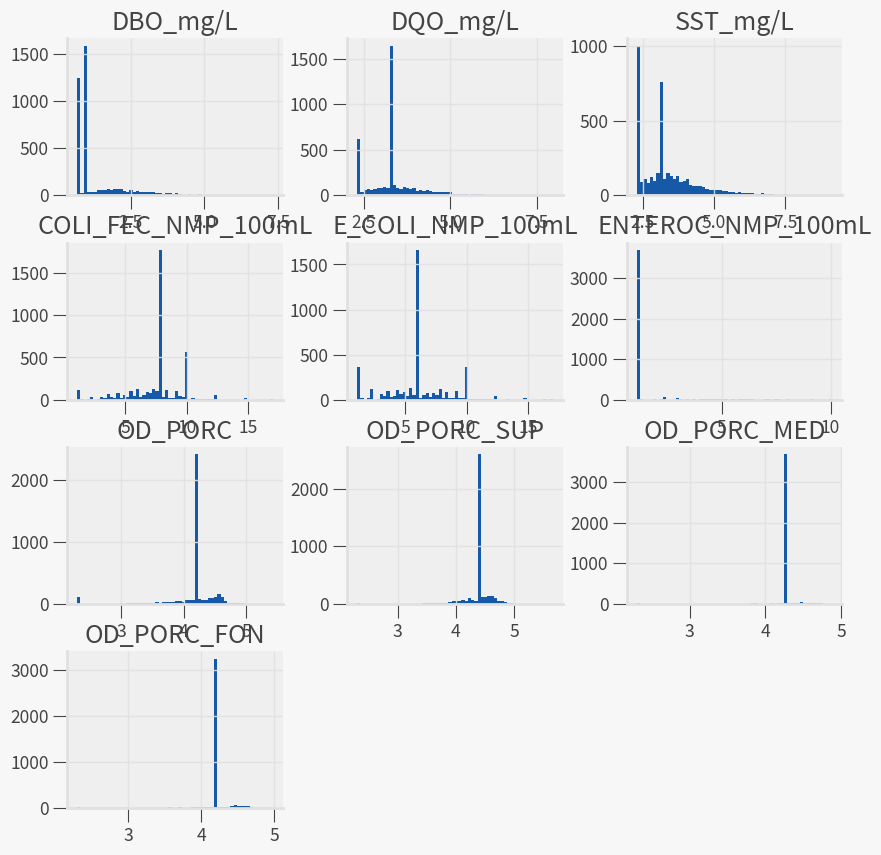

In [25]:
# Vamos a ver como estan los estadisticos

df_new4.hist(bins = 60, figsize=(10,10))

Se puede observar que salen picos grandes porque hay muchos datos vacíos en el dataset y a todos ellos se  les puso la media, y por eso se disparó. 

<AxesSubplot: >

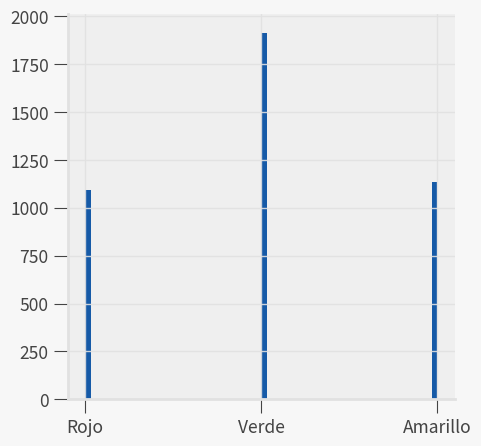

In [26]:
df_new3['SEMAFORO'].hist(bins = 60, figsize=(5,5))

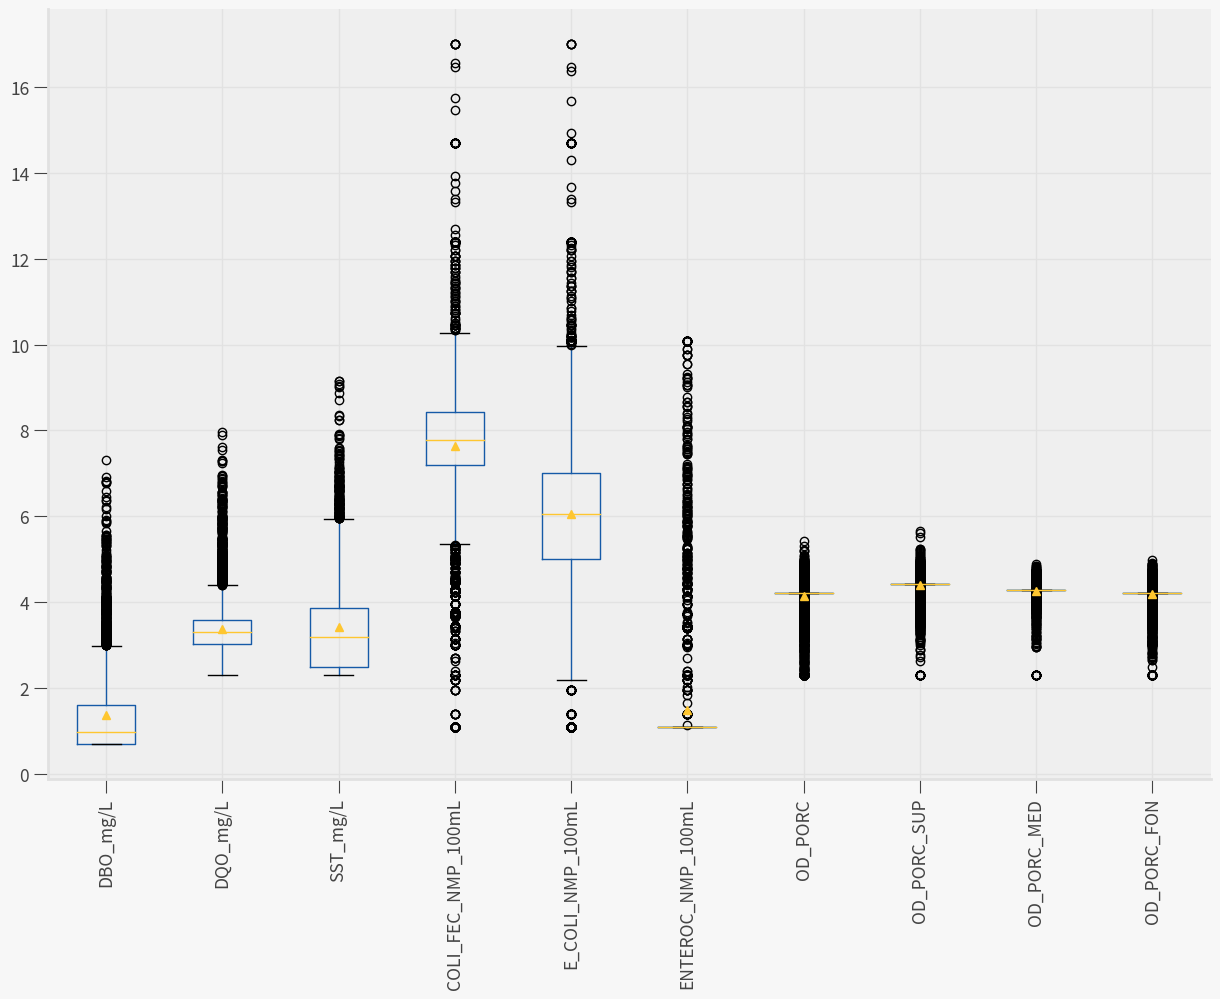

In [27]:
# Vamos a ver como andan los outliers

outliers = df_new4.boxplot(figsize = (15,10),showmeans = True)
outliers.plot()
plt.xticks(rotation=90)
plt.show()

Hay muchos outliers, los resultados estan muy sesgados. Este comportamiento se repite porque se inputó un dato muchas veces (ya fuera la moda o la mediana), por eso se acumula en una sola barra.

<AxesSubplot: >

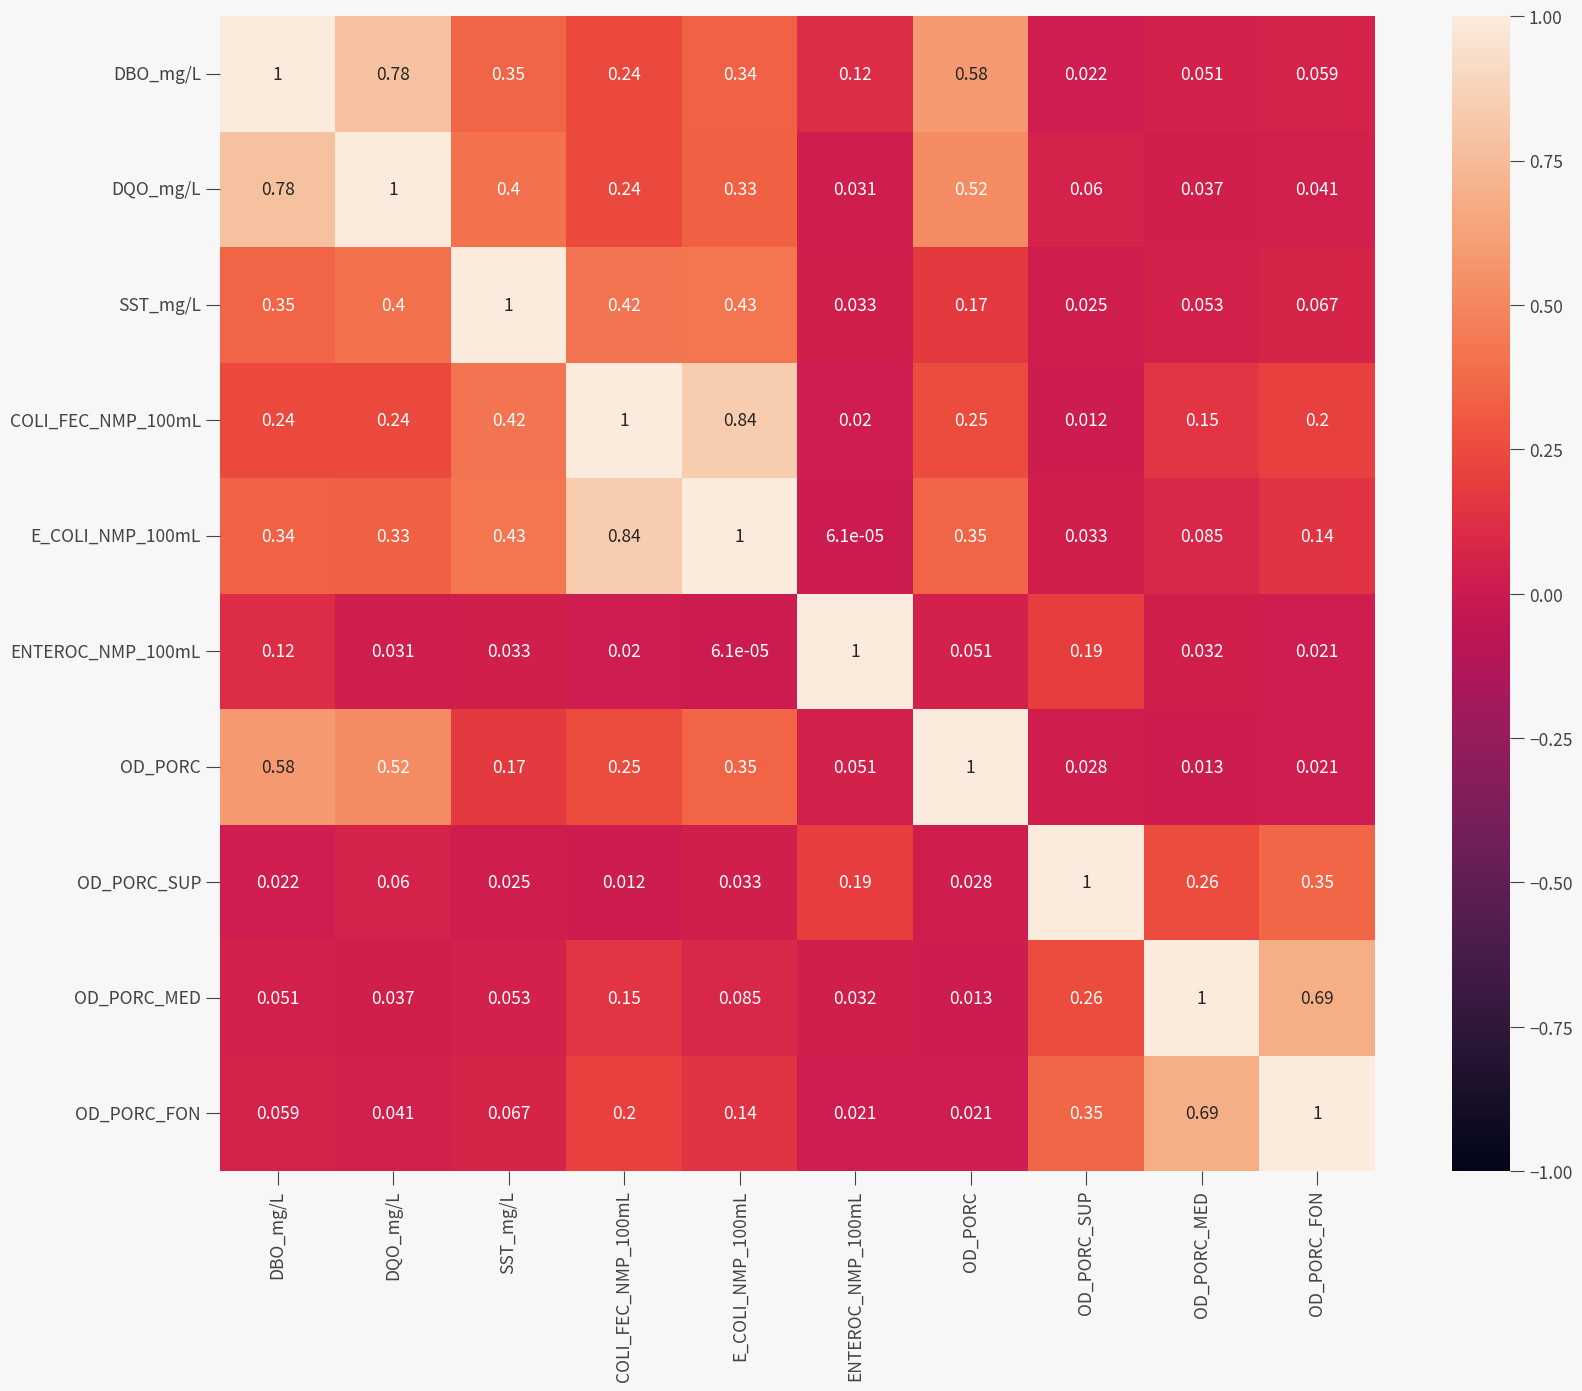

In [28]:
correlacion = df_new4.corr().abs() #El abs es por algo

f, ax = plt.subplots(figsize = (20,15)) #Definir el área de trabajo.

sns.heatmap(correlacion, vmax = 1, vmin = -1, square = True, annot = True)

Los resultados rojos son como en la gráfica de cajas, se cargó mucha la info de la mediana o de la moda como se había explicado anteriorment.

<AxesSubplot: xlabel='LONGITUD', ylabel='LATITUD'>

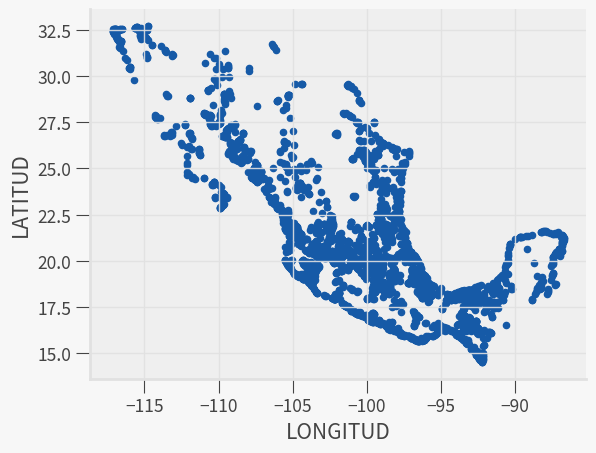

In [29]:
#Mapa de la ubicacion de las aguas superficiales

df_new3.plot.scatter('LONGITUD','LATITUD')

In [30]:
# Vamos a crear una nueva columna llamada COORDENADAS para pintar el mapa

df_new3["COORDENADAS"] = list(zip(df_new3.LONGITUD, df_new3.LATITUD))
df_new3["COORDENADAS"] = df_new3["COORDENADAS"].apply(Point)
df_new3.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO,COORDENADAS
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,SI,NO,SI,NO,SI,ND,SI,SI,LENTICO,POINT (-102.33911 22.2473)
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.8429 22.90473)
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.86442 22.8988)
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.88604 22.89609)
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.89657 22.87694)


In [31]:
gdf = gpd.GeoDataFrame(df_new3, geometry="COORDENADAS")
gdf.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO,COORDENADAS
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,SI,NO,SI,NO,SI,ND,SI,SI,LENTICO,POINT (-102.33911 22.24730)
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.84290 22.90473)
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.86442 22.89880)
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.88604 22.89609)
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.89657 22.87694)


In [32]:
#Vamos a separar la long y la lat en otro dataframe

latlong = df_new3[["LONGITUD","LATITUD"]]
latlong

,LONGITUD,LATITUD
0,-102.33911,22.24730
1,-109.84290,22.90473
2,-109.86442,22.89880
3,-109.88604,22.89609
4,-109.89657,22.87694
...,...,...
4136,-99.79553,20.14898
4137,-99.79553,20.14898
4138,-99.79553,20.14898
4139,-99.79553,20.14898


In [33]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [34]:
# Nombre de los paises disponibles en el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

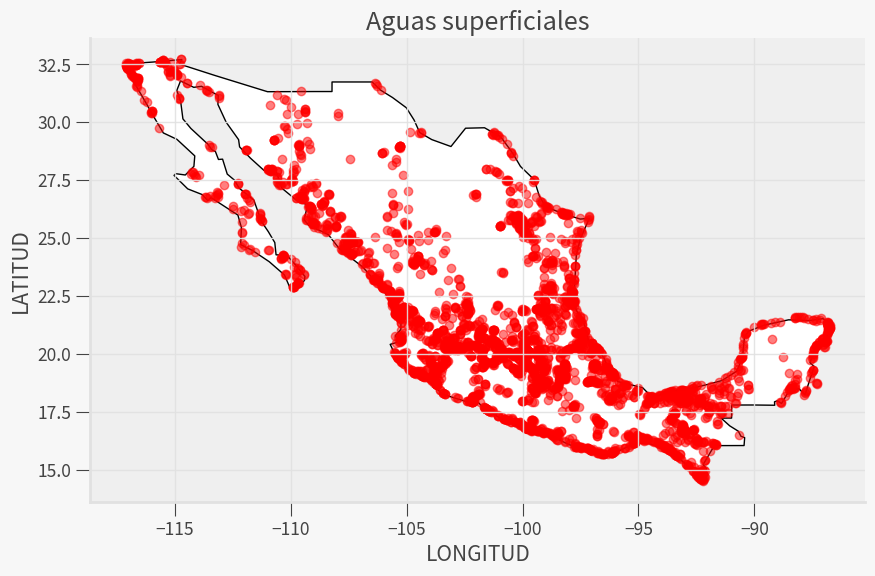

In [35]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# localidades
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Aguas superficiales')

#gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [36]:
X = latlong["LONGITUD"]
y = latlong["LATITUD"]

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(latlong)
df_latlong = pd.DataFrame(scaler.transform(latlong))
df_latlong.columns = latlong.columns

k_range = range(1,10)
sse = []

for k in k_range:
  km  = KMeans(n_clusters= k)
  km.fit(df_latlong)
  sse.append(km.inertia_)

In [38]:
# Modelo de predicción
# Voy a dividir mis datos en grupos

model = KMeans(n_clusters=6, max_iter=1000, random_state=0)
y_pred = model.fit_predict(df_latlong)

df_centers = pd.DataFrame(model.cluster_centers_)
df_centers.columns = latlong.columns
df_centers

,LONGITUD,LATITUD
0,0.071833,0.949180
1,0.800200,0.171578
2,0.268947,0.638679
3,0.583437,0.281925
4,0.434003,0.349943
5,0.571906,0.590071


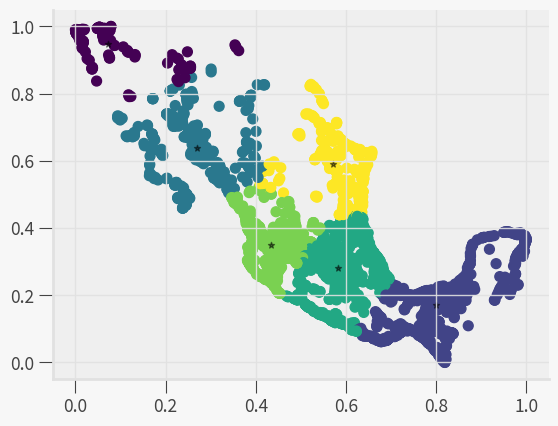

In [39]:
# Creando los clusters
plt.scatter(df_latlong["LONGITUD"], df_latlong["LATITUD"], c=y_pred, s=50, cmap='viridis')
plt.scatter(df_centers["LONGITUD"], df_centers["LATITUD"], c='black',marker="*", s=20, alpha=.5);

In [40]:
# Vamos a ver las coordenadas de los clusters

df_Centers_RealCoordenates = pd.DataFrame(scaler.inverse_transform(df_centers))
df_Centers_RealCoordenates.columns = df_centers.columns
df_Centers_RealCoordenates
df_Centers_RealCoordenates = pd.DataFrame(scaler.inverse_transform(df_centers))
df_Centers_RealCoordenates.columns = df_centers.columns
df_Centers_RealCoordenates

,LONGITUD,LATITUD
0,-114.940875,31.783025
1,-92.804456,17.652750
2,-108.950236,26.140729
3,-99.392289,19.657941
4,-103.933864,20.893934
5,-99.742741,25.257447


In [41]:
# Los grupos, vamos a hacer un Dataframe por grupo

y_pred = pd.DataFrame(y_pred)
y_pred.columns = ["Clusters"]
df0 = y_pred[y_pred.Clusters == 0]
df1 = y_pred[y_pred.Clusters == 1]
df2 = y_pred[y_pred.Clusters == 2]
df3 = y_pred[y_pred.Clusters == 3]
df4 = y_pred[y_pred.Clusters == 4]
df5 = y_pred[y_pred.Clusters == 5]

print("Cluster 0: "+ str(df0.shape))
print("Cluster 1: "+ str(df1.shape))
print("Cluster 2: "+ str(df2.shape))
print("Cluster 3: "+ str(df3.shape))
print("Cluster 4: "+ str(df4.shape))
print("Cluster 5: "+ str(df5.shape))

Cluster 0: (145, 1)
Cluster 1: (819, 1)
Cluster 2: (387, 1)
Cluster 3: (1825, 1)
Cluster 4: (655, 1)
Cluster 5: (310, 1)


## Ahora vamos a correlacionar con los semaforos

In [42]:
# Vamos a sustituir verde, amarillo y rojo por numeros para que los podamos pintar en el mapa

semaforos = df_new3[["LONGITUD","LATITUD", "SEMAFORO"]]
semaforos["SEMAFORO"] = semaforos["SEMAFORO"].replace("Rojo", 1)
semaforos["SEMAFORO"] = semaforos["SEMAFORO"].replace("Amarillo", 2)
semaforos["SEMAFORO"] = semaforos["SEMAFORO"].replace("Verde", 3)
semaforos

,LONGITUD,LATITUD,SEMAFORO
0,-102.33911,22.24730,1
1,-109.84290,22.90473,3
2,-109.86442,22.89880,3
3,-109.88604,22.89609,3
4,-109.89657,22.87694,3
...,...,...,...
4136,-99.79553,20.14898,3
4137,-99.79553,20.14898,3
4138,-99.79553,20.14898,3
4139,-99.79553,20.14898,3


In [43]:
# Vamos a hacer tres dataframes, uno para los amarillos, otro para los verdes y otro para los rojos

rojos = semaforos[semaforos["SEMAFORO"] == 1]
verdes = semaforos[semaforos["SEMAFORO"] == 3]
amarillos = semaforos[semaforos["SEMAFORO"] == 2]

Vamos a pintar tres mapas, uno para los de semáforo verde, otro para los de semaforo rojo y los utlimos para semaforo amarillo, porque la categoría sólo es una (una por cada luz del semáforo), y si lo pintamos todo sobre un mapa, se distorsionan los resultados.

In [44]:
# Funcion para pintar los clusters por color del semaforo

def clusters_semforos(df_semaforo, color):

  scaler = MinMaxScaler()
  scaler.fit(df_semaforo)
  df_latlong = pd.DataFrame(scaler.transform(df_semaforo))
  df_latlong.columns = df_semaforo.columns

  k_range = range(1,10)
  sse = []

  for k in k_range:
    km  = KMeans(n_clusters= k)
    km.fit(df_latlong)
    sse.append(km.inertia_)


  model = KMeans(n_clusters=1, max_iter=1000, random_state=0)
  y_pred = model.fit_predict(df_latlong)

  df_centers = pd.DataFrame(model.cluster_centers_)
  df_centers.columns = df_semaforo.columns
  df_centers
  plt.scatter(df_semaforo["LONGITUD"], df_semaforo["LATITUD"], c=y_pred, s=50, cmap='viridis')
  plt.scatter(df_semaforo["LONGITUD"], df_semaforo["LATITUD"], c=color, marker="*", s=20, alpha=.5);

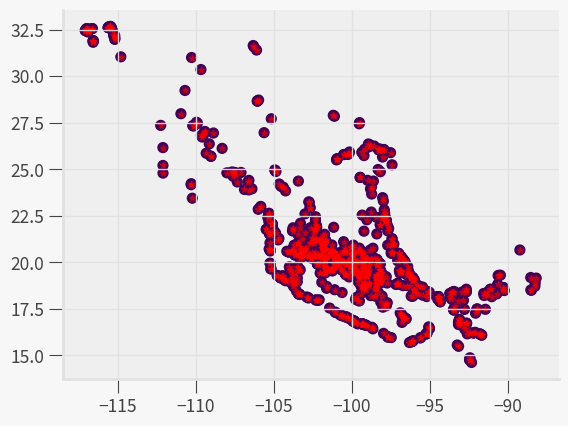

In [45]:
clusters_semforos(rojos, "red")

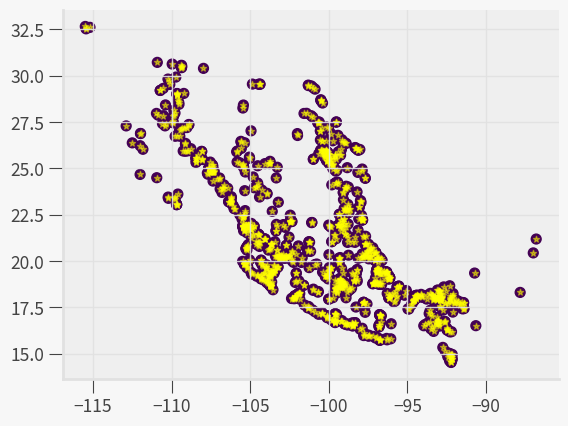

In [46]:
clusters_semforos(amarillos, "yellow")

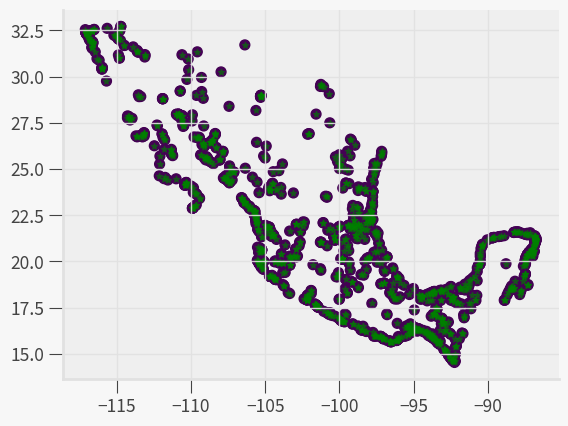

In [47]:
clusters_semforos(verdes, "green")

Al final se realizaron tres mapas, uno por cada color del semáforo para que se aprecie la calidad de las aguas superficiales y cada mapa presenta resultados diferentes. En el norte casi no se aprecian resultados, lo cual esta bien porque es una zona árida, pero lo preocupante es que en la zona centro el semáforo esta rojo, los resultados están muy cargados a diferencia del mapa del semáforo verde. 